In [12]:
import numpy as np
from matplotlib import pyplot as plt
from DS_Planck_Unet import *
from tqdm.notebook import tqdm

In [14]:
radius = [0.08, 0.8, 1.0, 2.0]
sum_masks = []
sum_masks_cen_in = []
for r in tqdm(radius):
    train_gen = gen_data('/home/rt2122/Data/clusters/planck_z.csv', train_pix, 200, 
                        search_nside=256, min_rad=r, centers_in_patch=False)
    batch = next(train_gen)
    sm = np.sum(batch[1], axis=0)
    sum_masks.append(sm)
    
    train_gen = gen_data('/home/rt2122/Data/clusters/planck_z.csv', train_pix, 200, 
                        search_nside=256, min_rad=r, centers_in_patch=True)
    batch = next(train_gen)
    sm = np.sum(batch[1], axis=0)
    sum_masks_cen_in.append(sm)

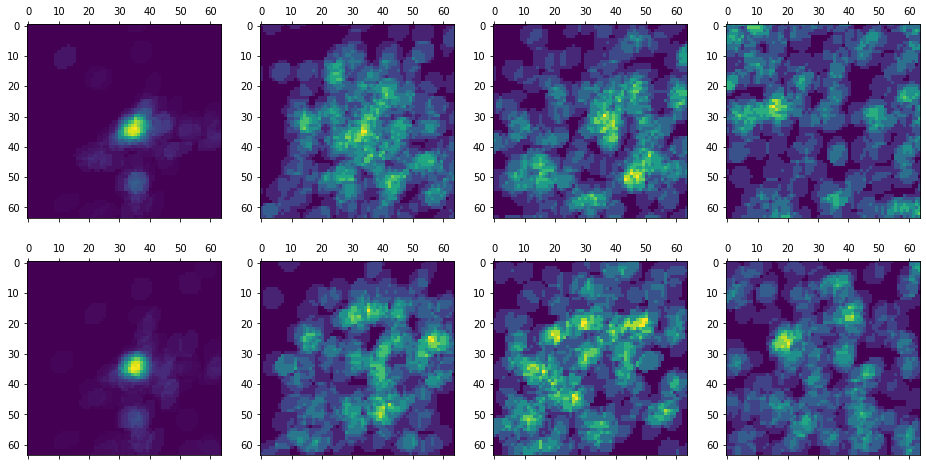

In [17]:
_, ax = plt.subplots(2, 4, figsize=(16, 8))
for i in range(4):
    ax[0][i].matshow(sum_masks[i][:,:,0])
    ax[1][i].matshow(sum_masks_cen_in[i][:,:,0])